In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [2]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [3]:
features = ['sepal length','sepal width','petal length','petal width']

In [4]:
x = df.loc[:,features].values

In [5]:
y = df.loc[:, 'target'].values

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=3)

In [8]:
pca_3 = pca.fit_transform(x)
pca_df = pd.DataFrame(data = pca_3, columns = ['x_1', 'x_2', 'x_3'])
pca_df

,x_1,x_2,x_3
0,-2.684207,0.326607,-0.021512
1,-2.715391,-0.169557,-0.203521
2,-2.889820,-0.137346,0.024709
3,-2.746437,-0.311124,0.037672
4,-2.728593,0.333925,0.096230
...,...,...,...
145,1.944017,0.187415,0.179303
146,1.525664,-0.375021,-0.120636
147,1.764046,0.078519,0.130784
148,1.901629,0.115877,0.722874


In [9]:
new_df = pd.concat([pca_df ,df['target']] , axis = 1 )
new_df

,x_1,x_2,x_3,target
0,-2.684207,0.326607,-0.021512,Iris-setosa
1,-2.715391,-0.169557,-0.203521,Iris-setosa
2,-2.889820,-0.137346,0.024709,Iris-setosa
3,-2.746437,-0.311124,0.037672,Iris-setosa
4,-2.728593,0.333925,0.096230,Iris-setosa
...,...,...,...,...
145,1.944017,0.187415,0.179303,Iris-virginica
146,1.525664,-0.375021,-0.120636,Iris-virginica
147,1.764046,0.078519,0.130784,Iris-virginica
148,1.901629,0.115877,0.722874,Iris-virginica


In [10]:
x_val = new_df['x_1']
y_val = new_df['x_2']
z_val = new_df['x_3']

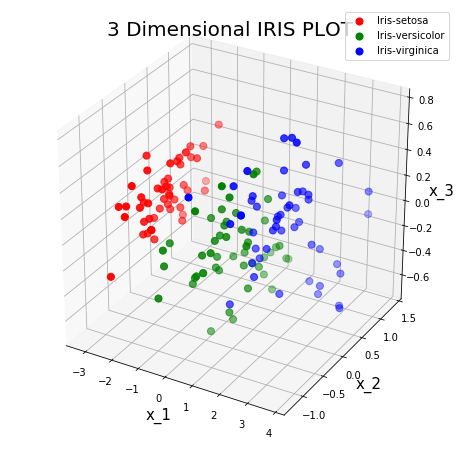

In [11]:
import random
# Create the figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x_1', fontsize = 15)
ax.set_ylabel('x_2', fontsize = 15)
ax.set_zlabel('x_3', fontsize = 15)
ax.set_title('3 Dimensional IRIS PLOT', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = new_df['target'] == target
    ax.scatter(new_df.loc[indicesToKeep, 'x_1']
               , new_df.loc[indicesToKeep, 'x_2']
               , new_df.loc[indicesToKeep, 'x_3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()